In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

london_devices_loc = 'datasets/user_devices/london_user_device.csv'
birmingham_devices_loc = 'datasets/user_devices/birmingham_user_device.csv'
liverpool_devices_loc = 'datasets/user_devices/liverpool_user_device.csv'

london_userperf_loc = 'datasets/012020/userperf_ldn_2020_jan.csv'
birmingham_userperf_loc = 'datasets/012020/userperf_birm_2020_jan.csv'
liverpool_userperf_loc = 'datasets/012020/userperf_lpool_2020_jan.csv'

# rename 'decil' column to be inline with other notebooks
london_devices_pd = pd.read_csv(london_devices_loc, index_col=False).rename(columns={'decile': 'IMDDecil'})
birmingham_devices_pd = pd.read_csv(birmingham_devices_loc, index_col=False).rename(columns={'decile': 'IMDDecil'})
liverpool_devices_pd = pd.read_csv(liverpool_devices_loc, index_col=False).rename(columns={'decile': 'IMDDecil'})

london_userperf_pd = pd.read_csv(london_userperf_loc, index_col=False)
birmingham_userperf_pd = pd.read_csv(birmingham_userperf_loc, index_col=False)
liverpool_userperf_pd = pd.read_csv(liverpool_userperf_loc, index_col=False)

# 1. Preprocessing

## 1.1 Duplicate device_id entries 
sort the dataset on [deviceI_id, number of days] and keep device with max(number of days)

In [55]:
print('London : fraction of device_ids with multiple entries: ' + str(london_devices_pd.device_id.duplicated().sum()/london_devices_pd.device_id.nunique()))
print('Birmingham : fraction of device_ids with multiple entries: ' + str(birmingham_devices_pd.device_id.duplicated().sum()/birmingham_devices_pd.device_id.nunique()))
print('Liverpool : fraction of device_ids with multiple entries: ' + str(liverpool_devices_pd.device_id.duplicated().sum()/liverpool_devices_pd.device_id.nunique()))

London : fraction of device_ids with multiple entries: 0.0538089983638139
Birmingham : fraction of device_ids with multiple entries: 0.05816874773858369
Liverpool : fraction of device_ids with multiple entries: 0.05129884854745648


In [56]:
london_devices_pd = london_devices_pd.sort_values(['device_id','number_days']).drop_duplicates('device_id', keep='last')
birmingham_devices_pd = birmingham_devices_pd.sort_values(['device_id','number_days']).drop_duplicates('device_id', keep='last')
liverpool_devices_pd = liverpool_devices_pd.sort_values(['device_id','number_days']).drop_duplicates('device_id', keep='last')

## 1.2 nan values in categorical(string) columns


In [57]:
print('London : fraction of device_ids with NA tacClassification: ' + str(london_devices_pd.tacClassification.isna().sum()/len(london_devices_pd)))
print('London : fraction of device_ids with NA tacDeviceType: ' + str(london_devices_pd.tacDeviceType.isna().sum()/len(london_devices_pd)))
print('London : fraction of device_ids with NA tacOS: ' + str(london_devices_pd.tacOS.isna().sum()/len(london_devices_pd)))
print('Birmingham : fraction of device_ids with NA tacClassification: ' + str(birmingham_devices_pd.tacClassification.isna().sum()/len(birmingham_devices_pd)))
print('Birmingham : fraction of device_ids with NA tacDeviceType: ' + str(birmingham_devices_pd.tacDeviceType.isna().sum()/len(birmingham_devices_pd)))
print('Birmingham : fraction of device_ids with NA tacOS: ' + str(birmingham_devices_pd.tacOS.isna().sum()/len(birmingham_devices_pd)))
print('Liverpool : fraction of device_ids with NA tacClassification: ' + str(liverpool_devices_pd.tacClassification.isna().sum()/len(liverpool_devices_pd)))
print('Liverpool : fraction of device_ids with NA tacDeviceType: ' + str(liverpool_devices_pd.tacDeviceType.isna().sum()/len(liverpool_devices_pd)))
print('Liverpool : fraction of device_ids with NA tacOS: ' + str(liverpool_devices_pd.tacOS.isna().sum()/len(liverpool_devices_pd)))

London : fraction of device_ids with NA tacClassification: 0.00024369606523632332
London : fraction of device_ids with NA tacDeviceType: 0.00024369606523632332
London : fraction of device_ids with NA tacOS: 0.00024369606523632332
Birmingham : fraction of device_ids with NA tacClassification: 0.0005086053290915422
Birmingham : fraction of device_ids with NA tacDeviceType: 0.0005086053290915422
Birmingham : fraction of device_ids with NA tacOS: 0.0005086053290915422
Liverpool : fraction of device_ids with NA tacClassification: 0.0002456600065509335
Liverpool : fraction of device_ids with NA tacDeviceType: 0.0002456600065509335
Liverpool : fraction of device_ids with NA tacOS: 0.0002456600065509335


In [58]:
london_devices_pd.fillna('NA', inplace=True)
birmingham_devices_pd.fillna('NA', inplace=True)
liverpool_devices_pd.fillna('NA', inplace=True)

# 2. Analysis

In [78]:
# in case some city has unique or missing class
tacClassification_classes = np.unique(np.concatenate([london_devices_pd.tacClassification.unique(), birmingham_devices_pd.tacClassification.unique(), liverpool_devices_pd.tacClassification.unique()]))
tacDeviceType_classes = np.unique(np.concatenate([london_devices_pd.tacDeviceType.unique(), birmingham_devices_pd.tacDeviceType.unique(), liverpool_devices_pd.tacDeviceType.unique()]))
tacOS_classes = np.unique(np.concatenate([london_devices_pd.tacOS.unique(), birmingham_devices_pd.tacOS.unique(), liverpool_devices_pd.tacOS.unique()]))
print('tacClassification classes:\n' + str(tacClassification_classes))
print('tacDeviceType classes:\n' + str(tacDeviceType_classes))
print('tacOS classes:\n' + str(tacOS_classes))

tacClassification classes:
['NA' 'feat' 'm2m' 'smart']
tacDeviceType classes:
['NA' 'connected computer' 'dongle' 'handheld' 'iot device'
 'mobile phone/feature phone' 'modem' 'module' 'portable(include pda)'
 'smartphone' 'tablet' 'vehicle' 'wearable' 'wlan router']
tacOS classes:
['3g smart phone' 'NA' 'amss' 'android' 'bar phone' 'blackberry' 'embeded'
 'embeded sw' 'firefox' 'firefox,not known' 'ios' 'linux' 'm' 'mac os'
 'mocro' 'mtk' 'not known' 'not known,symbian' 'not known,tizen' 'nucleus'
 'other' 'proprietary' 'proprietary os' 'qnx' 'qsc6270' 'qualcomm'
 'qualcomm qsc6270 platform' 'rda1131' 'rex' 'rtk' 's30' 'sailfish'
 'spreadtrum' 'spreadtrum 6531' 'symbian' 'threadx' 'tizen' 'ubuntu'
 'unknown' 'windows' 'yunos (aliyun)' 'zhanxun sc6531da']


## 2.1 Analysis of tac classes
### 2.1.1 Fractions of tac classes

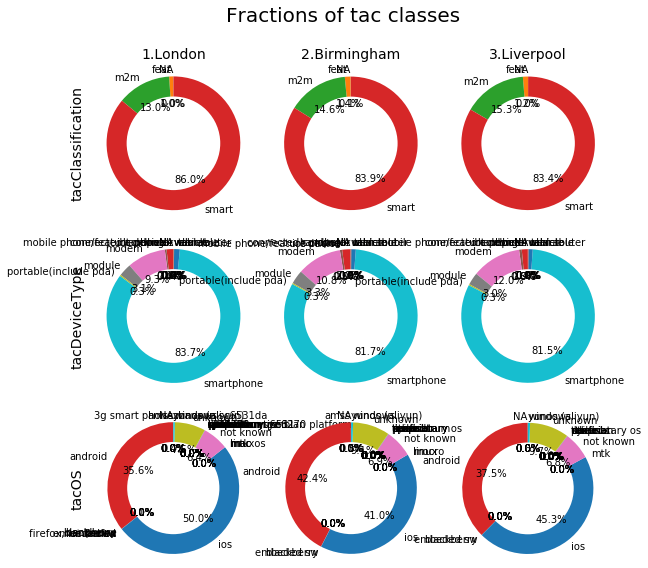

In [136]:
fig, ax = plt.subplots(3, 3, figsize=(9, 9), facecolor='w', edgecolor='k')
fig.suptitle('Fractions of tac classes', size=20 )

def applyPlotStyle(ax):
    #ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    #ax.set_ylim([0.3,1.05])
    ax.set_xlabel('')
    ax.set_ylabel('')
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax.add_artist(centre_circle)
    ax.axis('equal')
    
london_devices_pd.tacClassification.value_counts(normalize=True).reindex(tacClassification_classes, fill_value=0).plot.pie(ax=ax[0,0], autopct='%1.1f%%', startangle=90)
london_devices_pd.tacDeviceType.value_counts(normalize=True).reindex(tacDeviceType_classes, fill_value=0).plot.pie(ax=ax[1,0], autopct='%1.1f%%', startangle=90)
london_devices_pd.tacOS.value_counts(normalize=True).reindex(tacOS_classes, fill_value=0).plot.pie(ax=ax[2,0], autopct='%1.1f%%', startangle=90)
applyPlotStyle(ax[0,0])
applyPlotStyle(ax[1,0])
applyPlotStyle(ax[2,0])
ax[0,0].set_title('1.London', y=1.05, size=14)
ax[0,0].set_ylabel('tacClassification', labelpad=15, size=14)
ax[1,0].set_ylabel('tacDeviceType', labelpad=15, size=14)
ax[2,0].set_ylabel('tacOS', labelpad=15, size=14)

birmingham_devices_pd.tacClassification.value_counts(normalize=True).reindex(tacClassification_classes, fill_value=0).plot.pie(ax=ax[0,1], autopct='%1.1f%%', startangle=90)
birmingham_devices_pd.tacDeviceType.value_counts(normalize=True).reindex(tacDeviceType_classes, fill_value=0).plot.pie(ax=ax[1,1], autopct='%1.1f%%', startangle=90)
birmingham_devices_pd.tacOS.value_counts(normalize=True).reindex(tacOS_classes, fill_value=0).plot.pie(ax=ax[2,1], autopct='%1.1f%%', startangle=90)
applyPlotStyle(ax[0,1])
applyPlotStyle(ax[1,1])
applyPlotStyle(ax[2,1])
ax[0,1].set_title('2.Birmingham', y=1.05, size=14)

liverpool_devices_pd.tacClassification.value_counts(normalize=True).reindex(tacClassification_classes, fill_value=0).plot.pie(ax=ax[0,2], autopct='%1.1f%%', startangle=90)
liverpool_devices_pd.tacDeviceType.value_counts(normalize=True).reindex(tacDeviceType_classes, fill_value=0).plot.pie(ax=ax[1,2], autopct='%1.1f%%', startangle=90)
liverpool_devices_pd.tacOS.value_counts(normalize=True).reindex(tacOS_classes, fill_value=0).plot.pie(ax=ax[2,2], autopct='%1.1f%%', startangle=90)
applyPlotStyle(ax[0,2])
applyPlotStyle(ax[1,2])
applyPlotStyle(ax[2,2])
ax[0,2].set_title('3.Liverpool', y=1.05, size=14);

### 2.1.2 "Hierarchy exploration"
Exploration of hierarchy of values, i.e. check subtypes of tacClassification=m2m, then check subtypes of tacDeviceType=modem etc.  
Result:  
It makes sense to analyse **(i) ios vs android** and **(ii) smartphone vs modem** in the context of LSOA IMD deciles

In [145]:
print(liverpool_devices_pd[liverpool_devices_pd['tacClassification']=='m2m']['tacDeviceType'].value_counts())
print()
print(liverpool_devices_pd[liverpool_devices_pd['tacDeviceType']=='modem']['tacOS'].value_counts())

modem                         19023
module                         4720
handheld                        285
wlan router                     115
portable(include pda)            51
dongle                           49
iot device                       25
vehicle                          13
smartphone                        6
mobile phone/feature phone        5
tablet                            3
wearable                          2
Name: tacDeviceType, dtype: int64

unknown       13504
not known      5502
embeded sw        7
nucleus           5
rex               3
other             1
rtk               1
Name: tacOS, dtype: int64


### 2.1.3 Modem vs Smartphone per LSOA IMD decile

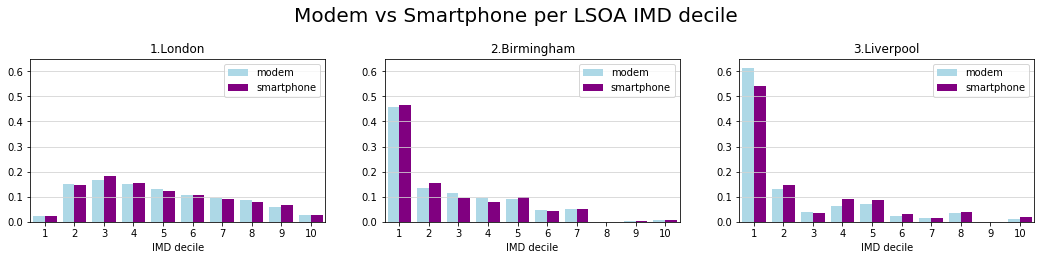

In [189]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Modem vs Smartphone per LSOA IMD decile', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.65])
    ax.set_xlabel('IMD decile')
    ax.set_xlim([0.5,10.5])
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
    ax.legend()
    
ax[0].hist([london_devices_pd[london_devices_pd.tacDeviceType=='modem'].decile,london_devices_pd[london_devices_pd.tacDeviceType=='smartphone'].decile],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True, label=['modem', 'smartphone'])
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

ax[1].hist([birmingham_devices_pd[birmingham_devices_pd.tacDeviceType=='modem'].decile,birmingham_devices_pd[birmingham_devices_pd.tacDeviceType=='smartphone'].decile],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True, label=['modem', 'smartphone'])
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

ax[2].hist([liverpool_devices_pd[liverpool_devices_pd.tacDeviceType=='modem'].decile,liverpool_devices_pd[liverpool_devices_pd.tacDeviceType=='smartphone'].decile],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True, label=['modem', 'smartphone'])
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

### 2.1.4 IOS vs Android per LSOA IMD decile

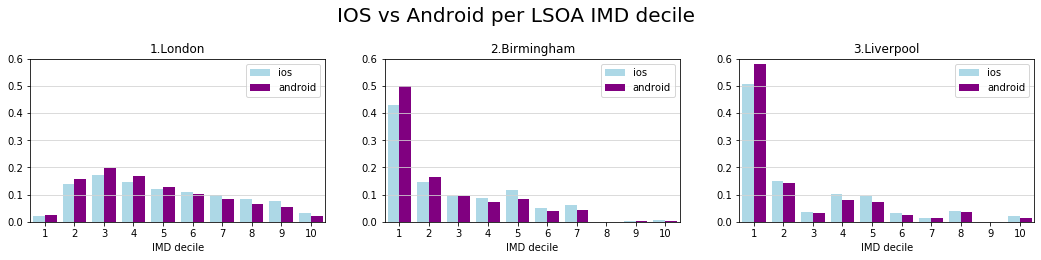

In [191]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('IOS vs Android per LSOA IMD decile', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.6])
    ax.set_xlabel('IMD decile')
    ax.set_xlim([0.5,10.5])
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
    ax.legend()
    
ax[0].hist([london_devices_pd[london_devices_pd.tacOS=='ios'].decile,london_devices_pd[london_devices_pd.tacOS=='android'].decile],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True, label=['ios', 'android'])
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

ax[1].hist([birmingham_devices_pd[birmingham_devices_pd.tacOS=='ios'].decile,birmingham_devices_pd[birmingham_devices_pd.tacOS=='android'].decile],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True, label=['ios', 'android'])
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

ax[2].hist([liverpool_devices_pd[liverpool_devices_pd.tacOS=='ios'].decile,liverpool_devices_pd[liverpool_devices_pd.tacOS=='android'].decile],color=['lightblue','purple'], bins=np.arange(12)-0.5, density=True, label=['ios', 'android'])
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

## 2.2 Fairness of received service depending on smartphone model

### Number of smartphone manufacturers before merging with UserPerf data

In [59]:
print('London : number of smartphone models : ' + str(london_devices_pd[london_devices_pd['tacDeviceType'] == 'smartphone']['tacModelName'].nunique()))
print('Birmingham : number of smartphone models : ' + str(birmingham_devices_pd[birmingham_devices_pd['tacDeviceType'] == 'smartphone']['tacModelName'].nunique()))
print('Liverpool : number of smartphone models : ' + str(liverpool_devices_pd[liverpool_devices_pd['tacDeviceType'] == 'smartphone']['tacModelName'].nunique()))
print()
print('London : number of smartphone manufacturers : ' + str(london_devices_pd[london_devices_pd['tacDeviceType'] == 'smartphone']['tacManufacturer'].nunique()))
print('Birmingham : number of smartphone manufacturers : ' + str(birmingham_devices_pd[birmingham_devices_pd['tacDeviceType'] == 'smartphone']['tacManufacturer'].nunique()))
print('Liverpool : number of smartphone manufacturers : ' + str(liverpool_devices_pd[liverpool_devices_pd['tacDeviceType'] == 'smartphone']['tacManufacturer'].nunique()))

London : number of smartphone models : 5592
Birmingham : number of smartphone models : 2797
Liverpool : number of smartphone models : 1929

London : number of smartphone manufacturers : 357
Birmingham : number of smartphone manufacturers : 184
Liverpool : number of smartphone manufacturers : 114


### Number of unique device_ids in UserPerf vs Smarthones device_ids in "UserDevice" datasets

In [95]:
london_devices_mnfs = london_devices_pd[london_devices_pd['tacDeviceType'] == 'smartphone'][['device_id','tacManufacturer','IMDDecil']].copy()
birmingham_devices_mnfs = birmingham_devices_pd[birmingham_devices_pd['tacDeviceType'] == 'smartphone'][['device_id','tacManufacturer','IMDDecil']].copy()
liverpool_devices_mnfs = liverpool_devices_pd[liverpool_devices_pd['tacDeviceType'] == 'smartphone'][['device_id','tacManufacturer','IMDDecil']].copy()

In [96]:
print('London : UserPerf / UserDevice count : ' + str(london_userperf_pd['device_id'].nunique()) + ' / ' + str(london_devices_mnfs['device_id'].nunique()))
print('Birmingham : UserPerf / UserDevice count : ' + str(birmingham_userperf_pd['device_id'].nunique()) + ' / ' + str(birmingham_devices_mnfs['device_id'].nunique()))
print('Liverpool : UserPerf / UserDevice count : ' + str(liverpool_userperf_pd['device_id'].nunique()) + ' / ' + str(liverpool_devices_mnfs['device_id'].nunique()))

London : UserPerf / UserDevice count : 1742563 / 2029935
Birmingham : UserPerf / UserDevice count : 202089 / 239452
Liverpool : UserPerf / UserDevice count : 119739 / 129353


### Merge datasets

In [177]:
london_userperf_pd = pd.merge(london_userperf_pd, london_devices_mnfs, on='device_id', how='inner')
birmingham_userperf_pd = pd.merge(birmingham_userperf_pd, birmingham_devices_mnfs, on='device_id', how='inner')
liverpool_userperf_pd = pd.merge(liverpool_userperf_pd, liverpool_devices_mnfs, on='device_id', how='inner')

### Number of smartphone manufacturers after merging with UserPerf data

In [178]:
print('London : number of smartphone manufacturers : ' + str(london_userperf_pd['tacManufacturer'].nunique()))
print('Birmingham : number of smartphone manufacturers : ' + str(birmingham_userperf_pd['tacManufacturer'].nunique()))
print('Liverpool : number of smartphone manufacturers : ' + str(liverpool_userperf_pd['tacManufacturer'].nunique()))

London : number of smartphone manufacturers : 270
Birmingham : number of smartphone manufacturers : 144
Liverpool : number of smartphone manufacturers : 100


### 2.2.1. Manufacturers dsitribution per LSOA IMD decile

In [179]:
london_manufacturer_counts = london_userperf_pd['tacManufacturer'].value_counts(normalize = True)
london_ordered = [london_manufacturer_counts[0]]
for i in range(1,len(london_manufacturer_counts)):
    london_ordered.append(london_manufacturer_counts[i] + london_ordered[i-1])
    
birmingham_manufacturer_counts = birmingham_userperf_pd['tacManufacturer'].value_counts(normalize = True)
birmingham_ordered = [birmingham_manufacturer_counts[0]]
for i in range(1,len(birmingham_manufacturer_counts)):
    birmingham_ordered.append(birmingham_manufacturer_counts[i] + birmingham_ordered[i-1])
    
liverpool_manufacturer_counts = liverpool_userperf_pd['tacManufacturer'].value_counts(normalize = True)
liverpool_ordered = [liverpool_manufacturer_counts[0]]
for i in range(1,len(liverpool_manufacturer_counts)):
    liverpool_ordered.append(liverpool_manufacturer_counts[i] + liverpool_ordered[i-1])

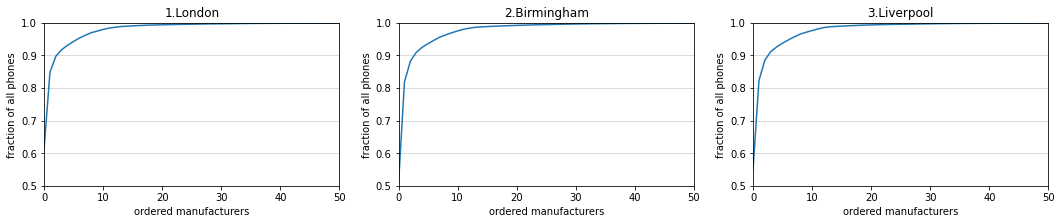

In [192]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
#fig.suptitle('Modem vs Smartphone per LSOA IMD decile', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0.5,1])
    ax.set_xlim([0,50])
    ax.set_xlabel('ordered manufacturers')
    ax.set_ylabel('fraction of all phones')
    
ax[0].plot(london_ordered)
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

ax[1].plot(birmingham_ordered)
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

ax[2].plot(liverpool_ordered)
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

In [181]:
# filter manufacturers with 99% of all devices
london_last_manufacturer = np.where(np.array(london_ordered) > 0.99)[0][0]
birmingham_last_manufacturer = np.where(np.array(birmingham_ordered) > 0.99)[0][0]
liverpool_last_manufacturer = np.where(np.array(liverpool_ordered) > 0.99)[0][0]

london_p99_manufacturers = london_manufacturer_counts.index.values[:london_last_manufacturer]
birmingham_p99_manufacturers = birmingham_manufacturer_counts.index.values[:birmingham_last_manufacturer]
liverpool_p99_manufacturers = liverpool_manufacturer_counts.index.values[:liverpool_last_manufacturer]

In [182]:
# prepare the dataset for plotting
london_userperf_pd = london_userperf_pd[london_userperf_pd['tacManufacturer'].isin(london_p99_manufacturers)]
birmingham_userperf_pd = birmingham_userperf_pd[birmingham_userperf_pd['tacManufacturer'].isin(birmingham_p99_manufacturers)]
liverpool_userperf_pd = liverpool_userperf_pd[liverpool_userperf_pd['tacManufacturer'].isin(liverpool_p99_manufacturers)]

london_userperf_pd['IMDDecil'] = london_userperf_pd['IMDDecil'].astype(int)
birmingham_userperf_pd['IMDDecil'] = birmingham_userperf_pd['IMDDecil'].astype(int)
liverpool_userperf_pd['IMDDecil'] = liverpool_userperf_pd['IMDDecil'].astype(int)

london = london_userperf_pd.pivot_table(index='tacManufacturer', columns='IMDDecil', aggfunc='size', fill_value=0)
london = london/london.sum()
birmingham = birmingham_userperf_pd.pivot_table(index='tacManufacturer', columns='IMDDecil', aggfunc='size', fill_value=0)
birmingham = birmingham/birmingham.sum()
liverpool = liverpool_userperf_pd.pivot_table(index='tacManufacturer', columns='IMDDecil', aggfunc='size', fill_value=0)
liverpool = liverpool/liverpool.sum()

### 2.2.2 Manufacturer distribution per LSOA IMD

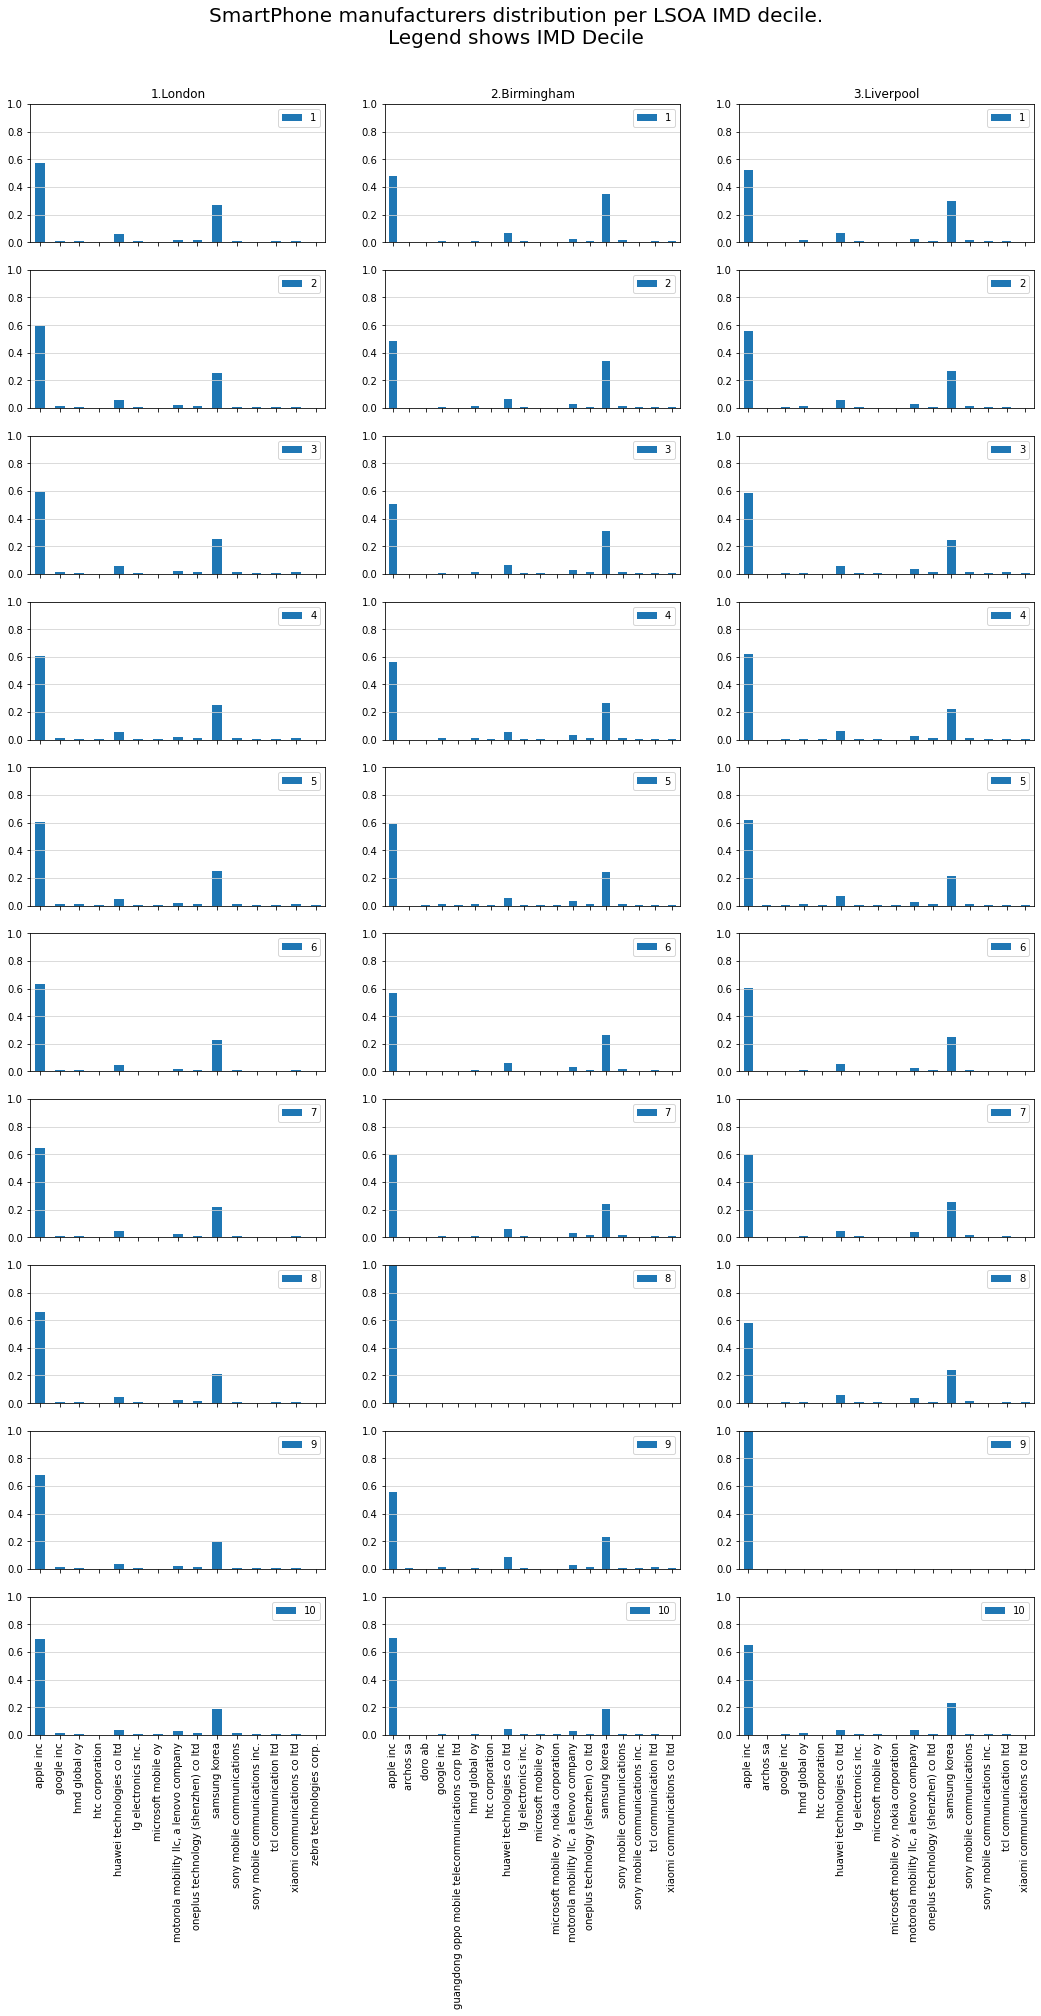

In [188]:
fig, ax = plt.subplots(10, 3, figsize=(18, 30), facecolor='w', edgecolor='k')
fig.suptitle('SmartPhone manufacturers distribution per LSOA IMD decile.\nLegend shows IMD Decile', size=20,y=.925)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,1])
    ax.set_xlabel('')
    ax.set_ylabel('')

ax[0,0].set_title('1.London')
ax[0,1].set_title('2.Birmingham')
ax[0,2].set_title('3.Liverpool');

for i in range(10):
    london.iloc[:,i].plot.bar(ax = ax[i,0],legend=True)
    birmingham.iloc[:,i].plot.bar(ax = ax[i,1],legend=True)
    liverpool.iloc[:,i].plot.bar(ax = ax[i,2],legend=True)
    applyPlotStyle(ax[i,0])
    applyPlotStyle(ax[i,1])
    applyPlotStyle(ax[i,2])
    if i!=9:
        ax[i,0].set_xticklabels('')
        ax[i,1].set_xticklabels('')
        ax[i,2].set_xticklabels('')

### 2.2.3. Manufacturers UserPerf Metrics across all LSOA IMDs

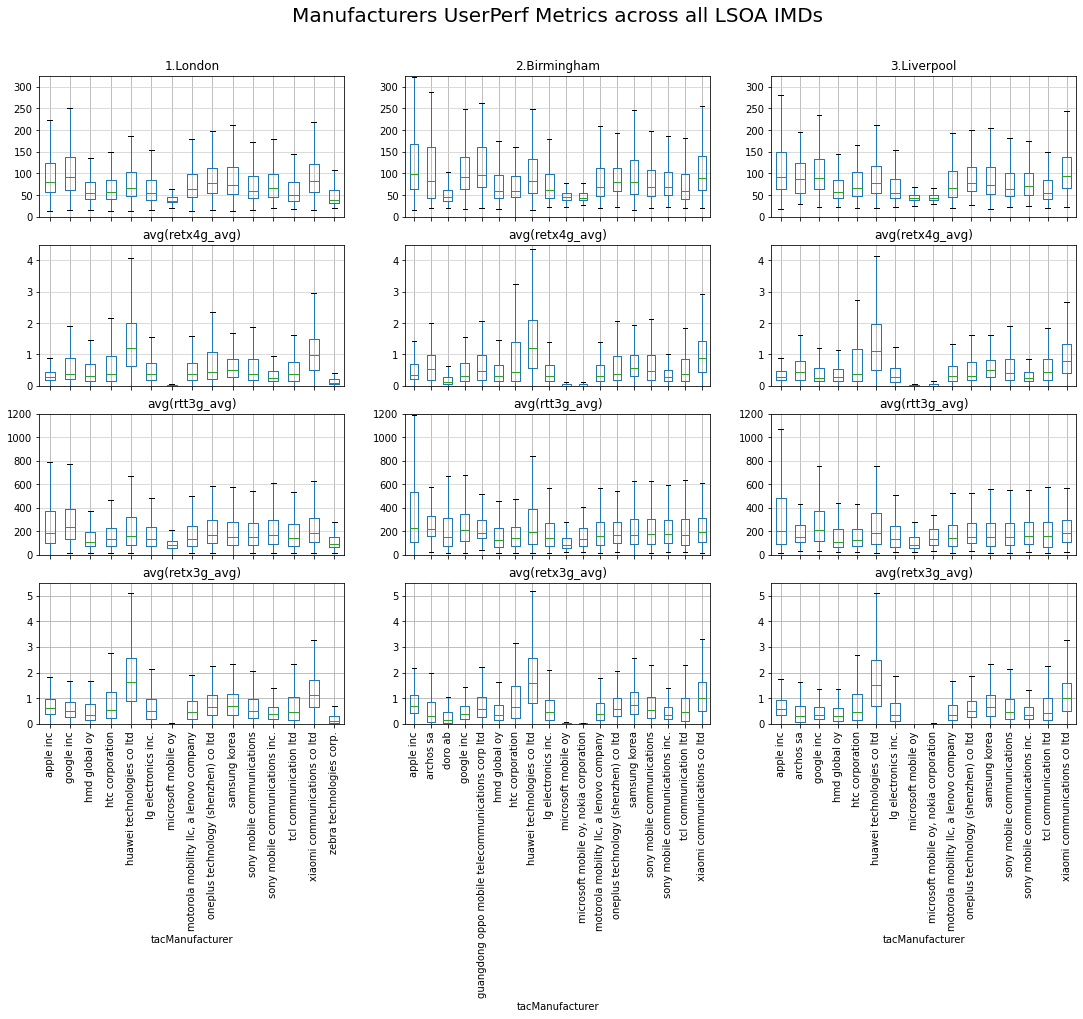

In [209]:
fig, ax = plt.subplots(4, 3, figsize=(18, 12), facecolor='w', edgecolor='k')

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_xlabel('')
    ax.set_xticklabels('')

metrics_list = ['avg(rtt4g_avg)','avg(retx4g_avg)','avg(rtt3g_avg)', 'avg(retx3g_avg)']

for i in range(len(metrics_list)):
    london_userperf_pd.boxplot(column=metrics_list[i], by='tacManufacturer', showfliers = False, ax = ax[i,0], rot=90)
    birmingham_userperf_pd.boxplot(column=metrics_list[i], by='tacManufacturer', showfliers = False, ax = ax[i,1], rot=90)
    liverpool_userperf_pd.boxplot(column=metrics_list[i], by='tacManufacturer', showfliers = False, ax = ax[i,2], rot=90)
    if i!=3:
        applyPlotStyle(ax[i,0])
        applyPlotStyle(ax[i,1])
        applyPlotStyle(ax[i,2])
    if i==0:
        ax[i,0].set_ylim([0,325])
        ax[i,1].set_ylim([0,325])
        ax[i,2].set_ylim([0,325])
    if i==1:
        ax[i,0].set_ylim([0,4.5])
        ax[i,1].set_ylim([0,4.5])
        ax[i,2].set_ylim([0,4.5])            
    if i==2:
        ax[i,0].set_ylim([0,1200])
        ax[i,1].set_ylim([0,1200])
        ax[i,2].set_ylim([0,1200])
    if i==3:
        ax[i,0].set_ylim([0,5.5])
        ax[i,1].set_ylim([0,5.5])
        ax[i,2].set_ylim([0,5.5])                    

        
fig.suptitle('Manufacturers UserPerf Metrics across all LSOA IMDs', size=20)
ax[0,0].set_title('1.London')
ax[0,1].set_title('2.Birmingham')
ax[0,2].set_title('3.Liverpool');

# 3. Filter Smartphone devices for UK_Diagrams_IMC2020.ipynb

In [209]:
london_homeantenna_loc = 'datasets/012020/home_ldn.csv'
birmingham_homeantenna_loc = 'datasets/012020/home_birm.csv'
liverpool_homeantenna_loc = 'datasets/012020/home_lpool.csv'

london_userperf_loc = 'datasets/012020/userperf_ldn_2020_jan.csv'
birmingham_userperf_loc = 'datasets/012020/userperf_birm_2020_jan.csv'
liverpool_userperf_loc = 'datasets/012020/userperf_lpool_2020_jan.csv'

In [210]:
london_homeantenna_pd = pd.read_csv(london_homeantenna_loc, index_col=False)
birmingham_homeantenna_pd = pd.read_csv(birmingham_homeantenna_loc, index_col=False)
liverpool_homeantenna_pd = pd.read_csv(liverpool_homeantenna_loc, index_col=False)

london_userperf_pd = pd.read_csv(london_userperf_loc, index_col=False)
birmingham_userperf_pd = pd.read_csv(birmingham_userperf_loc, index_col=False)
liverpool_userperf_pd = pd.read_csv(liverpool_userperf_loc, index_col=False)

In [211]:
# define data we will add to existing datasets(to make it easier to understand in merge) - for simplicity only filter data, do not add any additional information
london_devices_pd_2merge = london_devices_pd[london_devices_pd.tacDeviceType=='smartphone'][['device_id']]
birmingham_devices_pd_2merge = birmingham_devices_pd[birmingham_devices_pd.tacDeviceType=='smartphone'][['device_id']]
liverpool_devices_pd_2merge = liverpool_devices_pd[liverpool_devices_pd.tacDeviceType=='smartphone'][['device_id']] 

In [212]:
london_homeantenna_pd = pd.merge(london_homeantenna_pd, london_devices_pd_2merge, on='device_id', how='inner')
birmingham_homeantenna_pd = pd.merge(birmingham_homeantenna_pd, birmingham_devices_pd_2merge, on='device_id', how='inner')
liverpool_homeantenna_pd = pd.merge(liverpool_homeantenna_pd, liverpool_devices_pd_2merge, on='device_id', how='inner')

london_userperf_pd = pd.merge(london_userperf_pd, london_devices_pd_2merge, on='device_id', how='inner')
birmingham_userperf_pd = pd.merge(birmingham_userperf_pd, birmingham_devices_pd_2merge, on='device_id', how='inner')
liverpool_userperf_pd = pd.merge(liverpool_userperf_pd, liverpool_devices_pd_2merge, on='device_id', how='inner')

In [215]:
# [:-4] - until .csv in the string
london_homeantenna_pd.to_csv(london_homeantenna_loc[:-4] + '_onlysmartphones.csv', index=False)
birmingham_homeantenna_pd.to_csv(birmingham_homeantenna_loc[:-4] + '_onlysmartphones.csv', index=False)
liverpool_homeantenna_pd.to_csv(liverpool_homeantenna_loc[:-4] + '_onlysmartphones.csv', index=False)

london_userperf_pd.to_csv(london_userperf_loc[:-4] + '_onlysmartphones.csv', index=False)
birmingham_userperf_pd.to_csv(birmingham_userperf_loc[:-4] + '_onlysmartphones.csv', index=False)
liverpool_userperf_pd.to_csv(liverpool_userperf_loc[:-4] + '_onlysmartphones.csv', index=False)